In [18]:
from requests import get
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def get_response(url):
    response = get(url)
    # print(response.text)
    json = response.json()
    return pd.DataFrame(json[1:], columns=json[0])

In [6]:
url = f'https://api.census.gov/data/2021/pep/population?get=NAME,POP_2020&POP_2021&RANK_POP_2020&RANK_POP_2021&for=state:*'
df = get_response(url)

df['POP_2020'] = df['POP_2020'].astype(int)
df['POP_2021'] = df['POP_2021'].astype(int)

df['Change'] = df['POP_2021'] - df['POP_2020']
df['%Change'] = df['Change'] / df['POP_2020'] * 100

df = df[df['RANK_POP_2021'].notna()]
df = df[df['RANK_POP_2020'].notna()]

df['RANK_POP_2021'] = df['RANK_POP_2021'].astype(int)
df['RANK_POP_2020'] = df['RANK_POP_2020'].astype(int)

# df = df.drop("state", axis = 1)
df['POP_2021'] = df['POP_2021'].astype(int)
df['state'] = df['state'].astype(int)
# df["Change"] = df["Change"].abs()
# df["%Change"] = df["%Change"].abs()

df.sort_values(by=['NAME'])
display(df.head())

,NAME,POP_2020,POP_2021,RANK_POP_2020,RANK_POP_2021,state,Change,%Change
0,Oklahoma,3962031,3986639,28,28,40,24608,0.621096
1,Nebraska,1961455,1963692,37,37,31,2237,0.114048
2,Hawaii,1451911,1441553,40,40,15,-10358,-0.713405
3,South Dakota,887099,895376,46,46,46,8277,0.933041
4,Tennessee,6920119,6975218,16,16,47,55099,0.796215


In [9]:
# K-means clustering
X = df[['POP_2020', 'POP_2021']]
kmeans = KMeans(n_clusters=3,n_init=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [10]:
# Linear regression
X_reg = df[['POP_2020']]
y_reg = df['POP_2021']
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

In [11]:
# Print regression metrics
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 387344476.4335059
R-squared: 0.9999701470638498


In [12]:
# Confusion matrix
y_true = df['RANK_POP_2021']
y_pred = df['RANK_POP_2020']
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [14]:
# Assuming df is your DataFrame
df['Binary_Column'] = df['RANK_POP_2021'].apply(lambda x: 1 if x > 30 else 0)

# Display the modified DataFrame
display(df)

,NAME,POP_2020,POP_2021,RANK_POP_2020,RANK_POP_2021,state,Change,%Change,Cluster,Binary_Column
0,Oklahoma,3962031,3986639,28,28,40,24608,0.621096,2,0
1,Nebraska,1961455,1963692,37,37,31,2237,0.114048,2,1
2,Hawaii,1451911,1441553,40,40,15,-10358,-0.713405,2,1
3,South Dakota,887099,895376,46,46,46,8277,0.933041,2,1
4,Tennessee,6920119,6975218,16,16,47,55099,0.796215,1,0
5,Nevada,3114071,3143991,32,32,32,29920,0.960800,2,1
6,New Mexico,2117566,2115877,36,36,35,-1689,-0.079761,2,1
7,Iowa,3188669,3193079,31,31,19,4410,0.138302,2,1
8,Kansas,2935880,2934582,35,35,20,-1298,-0.044212,2,1
9,District of Columbia,690093,670050,49,49,11,-20043,-2.904391,2,1


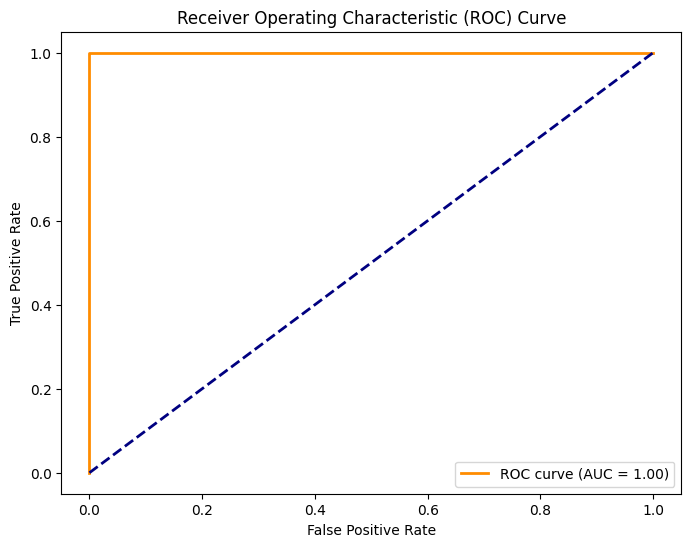

In [15]:
# Features and target variable
X = df[['POP_2020', 'POP_2021']]
y = df['Binary_Column']

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Get predicted probabilities
y_probs = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
# Assuming you have your features (X) and target variable (y) ready
X = df[['POP_2020', 'POP_2021']]
y = df['Binary_Column']

# Create your model (replace this with your actual model)
model = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

# Print the cross-validated AUC scores
print("Cross-validated AUC scores:", cv_scores)
print("Mean AUC:", cv_scores.mean())


Cross-validated AUC scores: [1.         1.         1.         1.         0.83333333]
Mean AUC: 0.9666666666666666


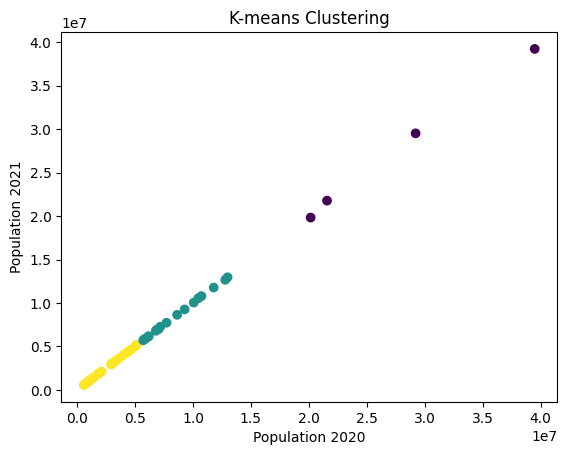

In [17]:
# Scatter plot
plt.scatter(df['POP_2020'], df['POP_2021'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Population 2020')
plt.ylabel('Population 2021')
plt.title('K-means Clustering')
plt.show()

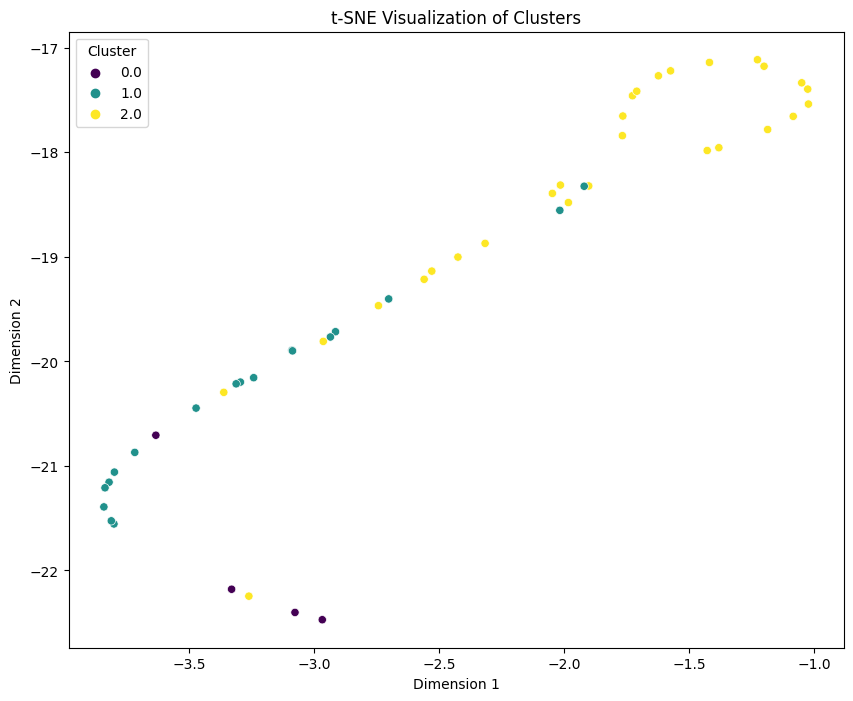

In [19]:
# Assuming 'X' is your feature matrix
X = df[['POP_2020', 'POP_2021']]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add the 'Cluster' column to the t-SNE results
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = df['Cluster']

# Scatter plot using Seaborn for better aesthetics
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=df_tsne, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [20]:
pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=90101e72cc4b0e20db80ed881adf067c38e9ddd9816c917b19645f723e69b44a
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


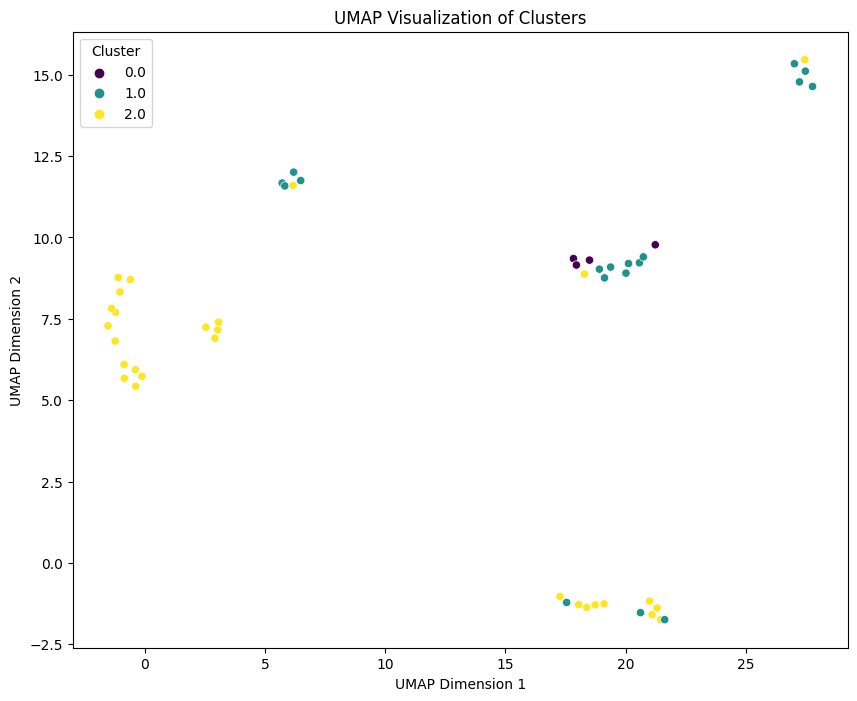

In [21]:
import umap

# Assuming 'X' is your feature matrix
X = df[['POP_2020', 'POP_2021']]

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
X_umap = umap_model.fit_transform(X)

# Add the 'Cluster' column to the UMAP results
df_umap = pd.DataFrame(X_umap, columns=['UMAP Dimension 1', 'UMAP Dimension 2'])
df_umap['Cluster'] = df['Cluster']

# Scatter plot using Seaborn for better aesthetics
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP Dimension 1', y='UMAP Dimension 2', hue='Cluster', data=df_umap, palette='viridis')
plt.title('UMAP Visualization of Clusters')
plt.show()
